<h1 style="font-size:42px; text-align:center; margin-bottom:30px;">HR Employee<span style="color:SteelBlue"> Attrition </span> Dataset</h1>
<hr>

Welcome to the workbook for <span style="color:royalblue">HR attrition prediction</span>.


<h1 style="font-size:20px;"><span style="color:SteelBlue"> Problem statement: </span> To predict attrition in the company and find out the factors affecting the attrition.</h1>

Our goals are as mentioned below. 
* Predict if an employee is going to leave the company based on dataset provided.
* Understand the factors that are responsible for attrition od employees.
* Generate insights and help the company to fix the problem and retain employee.


<br><hr id="toc">


In this module, we'll go through the following steps:

1.  [Data Import (Target variable is “Attrition” column)](#import)
2.  [Perform Exploratory Data Analysis](#eda)
3.  [Split the data in Dev & Hold Out sample (70:30)](#split)
4.  [Identify columns which are of no use. drop those columns](#idf)
5.  [Write Hypothesis and validate the Hypothesis](#hyp)
6.  [Build Neural Network Model (Development sample)](#nn)
7.  [Validate NN model on Hold Out. If need be improvise](#vnn)
8.  [Build Random Forest Model](#rf)
9.  [Validate RF Model](#vrf)
10. [Compare NN and RF model](#cmp)
11. [Combine NN and RF into Ensemble Model](#ensemble)
12. [Check whether Ensemble Model Performance outperforms the individual models](#check) 
13. [Insights and Conclusions](#lg)


Importing libraries


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns  
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


Function to compute the confusion matrix, accuracy and classification report


In [2]:
def accur(m,n):
    cm = confusion_matrix(m, n)
    print('\033[1m'+'Confusion Matrix :  '+'\033[0m') 
    print(cm)
    print(' ')
    print('\033[1m'+'Accuracy of the Model :  '+'\033[0m')
    print((cm[0][0]+cm[1][1])/(cm.sum())*100)
    print(' ')
    print('\033[1m'+'Classification Report : '+'\033[0m')
    print(classification_report(m, n))

Function to create graphs for Univariate analysis


In [165]:
def graph_version3(x,number_of_columns):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns    
    import os
    
   
    data=x
    #if not os.path.exists(newpath):
     #   os.makedirs(newpath)
    
    if number_of_columns == None:
        for i, col in enumerate(data.columns):
            b=''
            b=data[col].dtype
            if len(data[col].unique())<15 or b==object :
                g = sns.factorplot(col, data=data, aspect=1.5, kind="count", size=4)    
                if b==object:
                    g.set_xticklabels(rotation=45)

                plt.title('Barplot of {0}'.format(col),fontsize=10)
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Count')              
                #plt.savefig(newpath+'//barplot_{0}.png'.format(col))
                plt.show()

            else:
                plt.hist(data[col]) 
                plt.title('Histogram of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Frequecy of {0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//histogram_{0}.png'.format(col))
                plt.show()
                plt.boxplot(data[col]) 
                plt.title('Boxplot of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//boxplot_{0}.png'.format(col))
                plt.show()
    else:
        all_columns_we_need = data.columns[number_of_columns]
        needed_dataframe = data[all_columns_we_need]
        
         #cars=pd.read_csv('mtcars.csv')
            #our_columns = needed_dataframe[[1,3,4]]
        for i, col in enumerate(needed_dataframe.columns):
            b=''
            b=needed_dataframe[col].dtype
            if len(needed_dataframe[col].unique())<15 or b==object :
                g = sns.factorplot(col, data=needed_dataframe, aspect=1.5, kind="count", size=4)    
                if b==object:
                    g.set_xticklabels(rotation=45)

                plt.title('Barplot of {0}'.format(col),fontsize=10)
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Count')
                #plt.show()
                #plt.savefig(newpath+'//barplot_{0}.png'.format(col))
                plt.show()

            else:
                plt.hist(needed_dataframe[col]) 
                plt.title('Histogram of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                plt.ylabel('Frequecy of {0}'.format(col))
                #plt.savefig(newpath+'//histogram_{0}.png'.format(col))
                plt.show()
                plt.boxplot(needed_dataframe[col]) 
                plt.title('Boxplot of {0}'.format(col))
                plt.xlabel('{0}'.format(col))
                #plt.show()
                #plt.savefig(newpath+'//boxplot_{0}.png'.format(col))
                plt.show()
            


<br id = 'import'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">1. Data Import</span>

Importing the data and reading its first 5 rows


In [4]:
df=pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'eda'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">2. Exploratory Data Analysis</span>

Checking the shape of the data


In [5]:
df.shape

(2940, 35)

Checking the category of the variable

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

Checking for missing values

In [7]:
df.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data Description for numerical variables to check mean, SD, Count, Min value, Max value, 25%, 50%, 75% percentile and Max value.

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Univariate Analysis

Plotting graphs  for Univariate Analysis


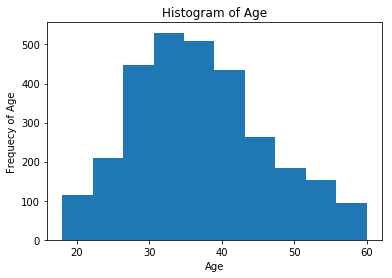

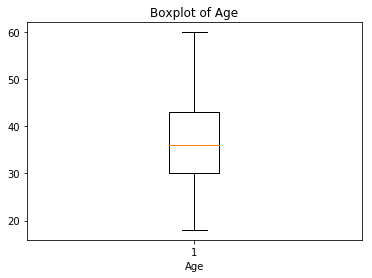

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


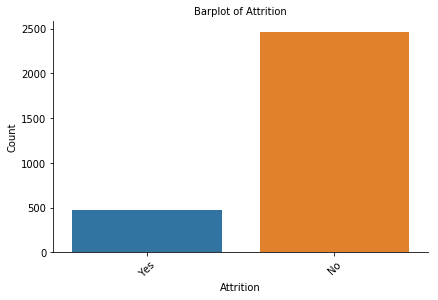

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


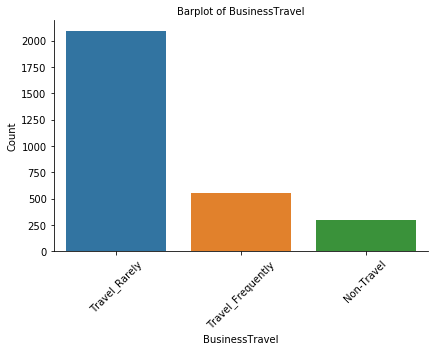

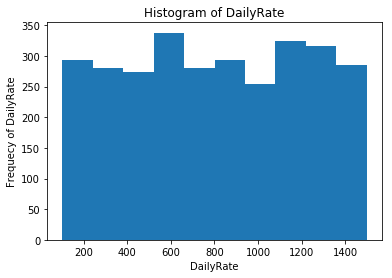

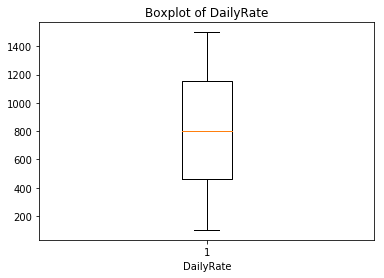

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


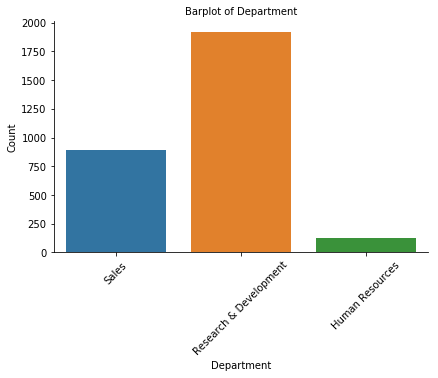

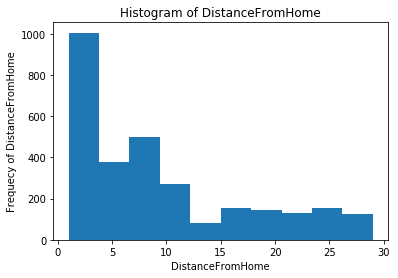

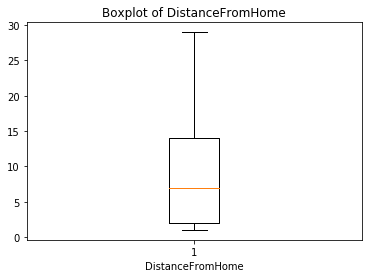

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


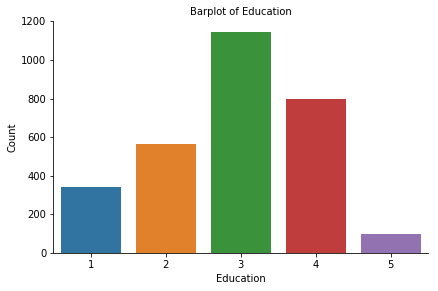

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


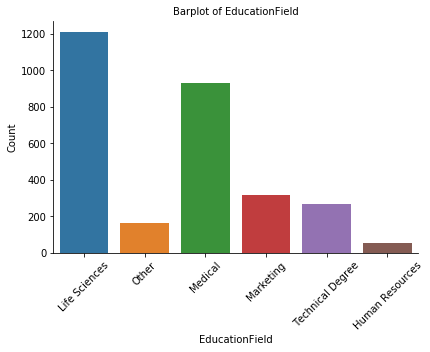

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


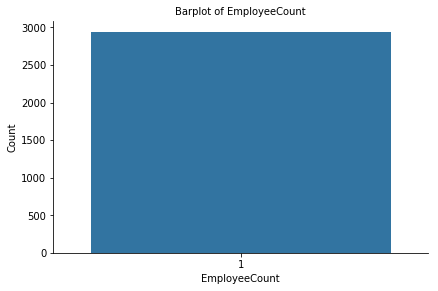

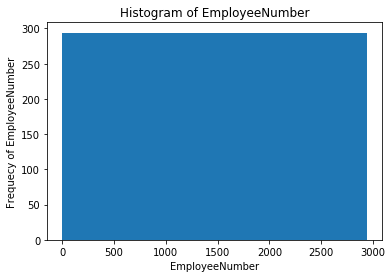

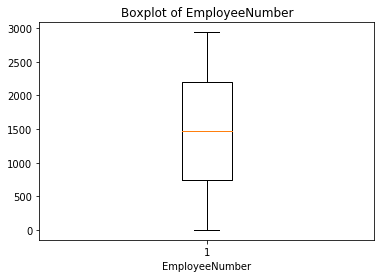

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


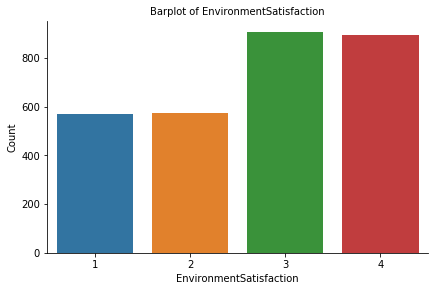

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


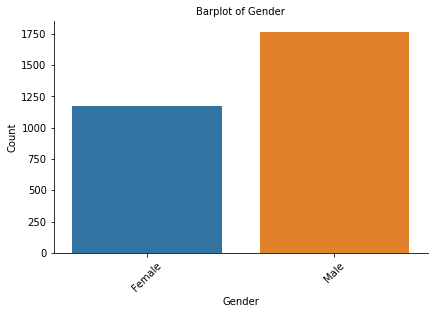

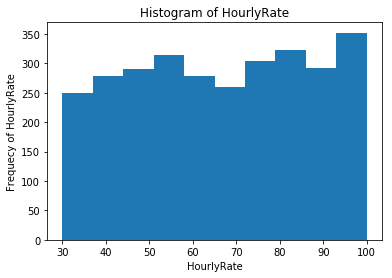

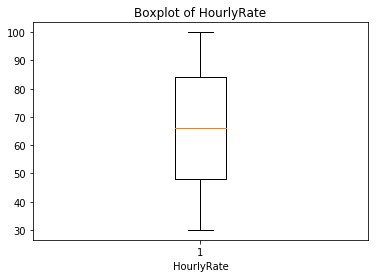

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


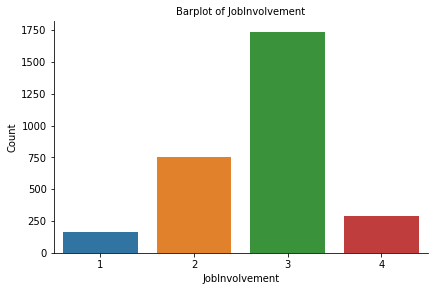

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


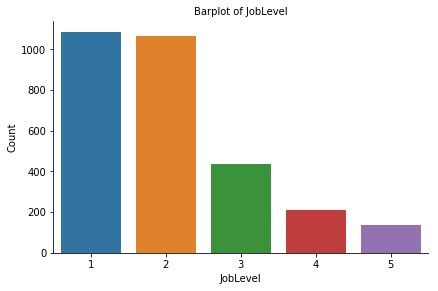

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


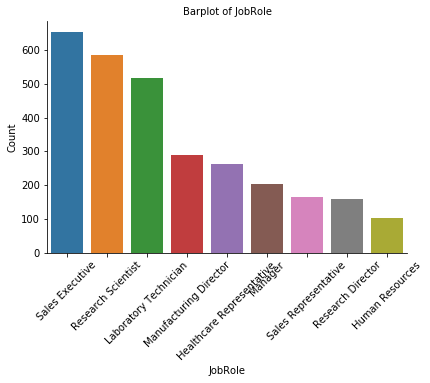

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


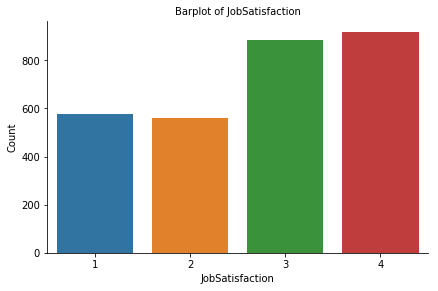

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


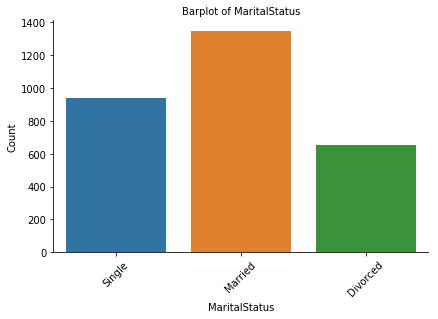

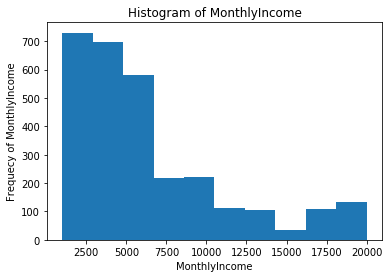

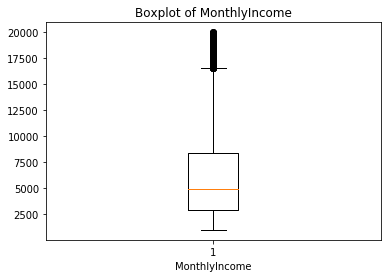

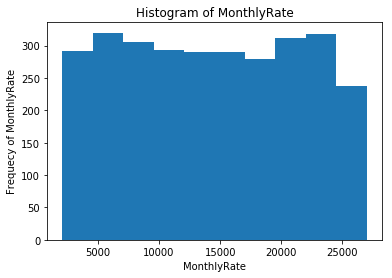

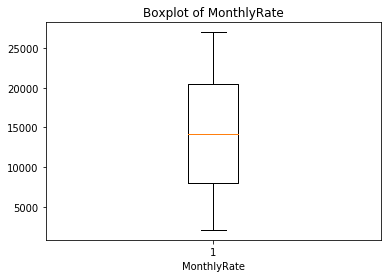

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


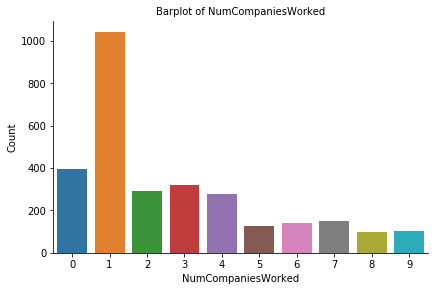

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


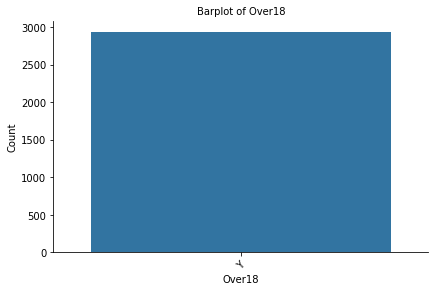

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


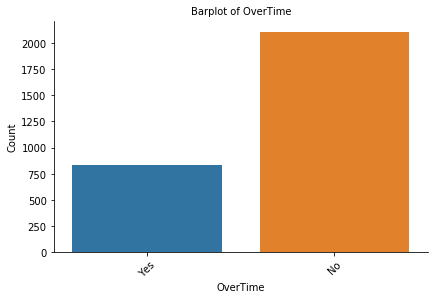

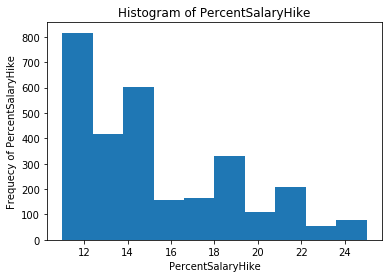

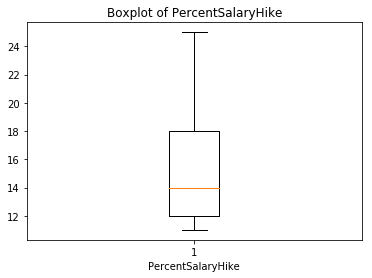

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


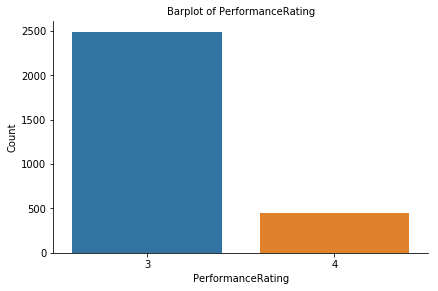

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


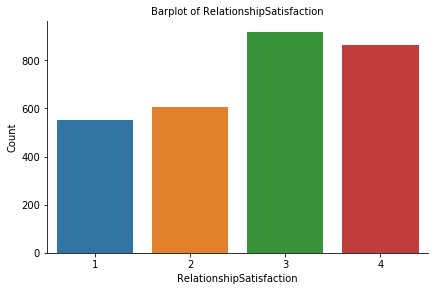

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


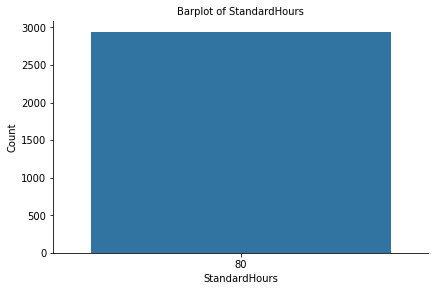

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


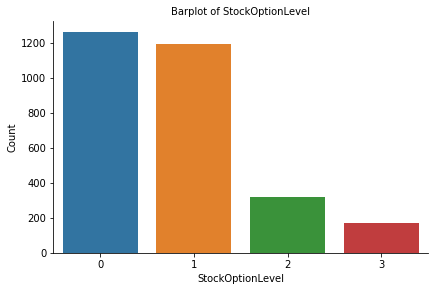

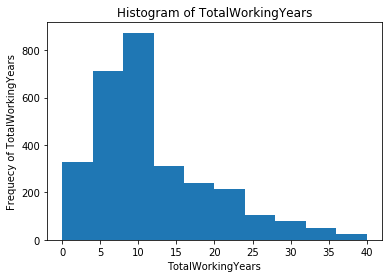

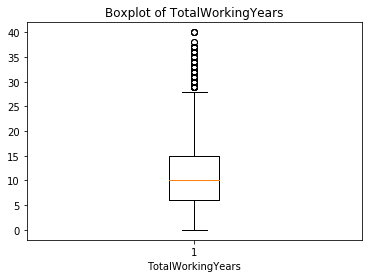

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


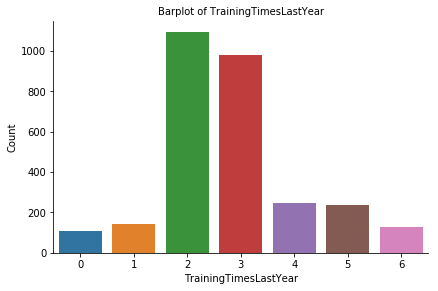

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


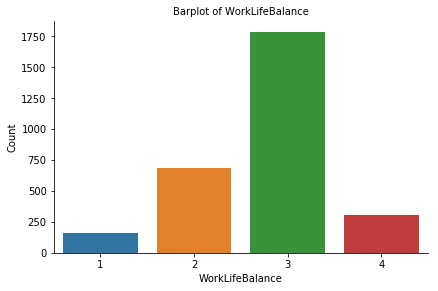

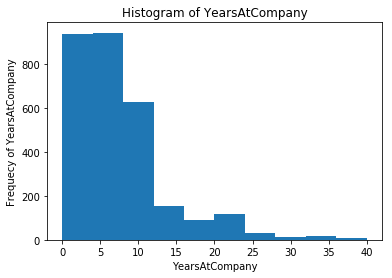

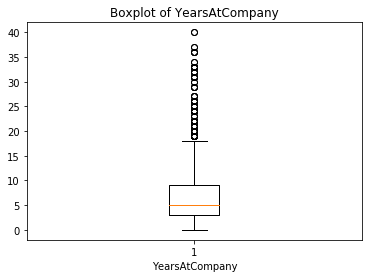

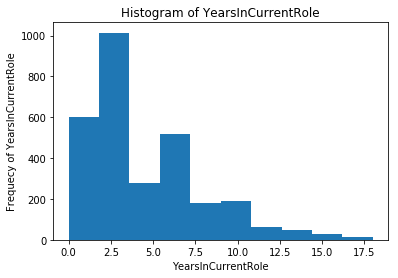

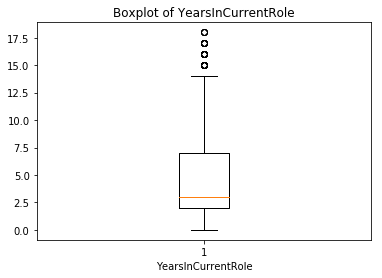

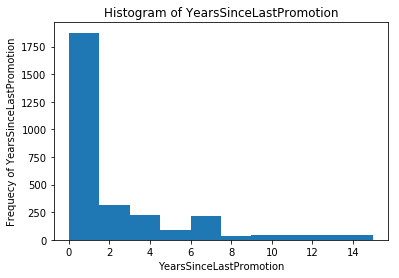

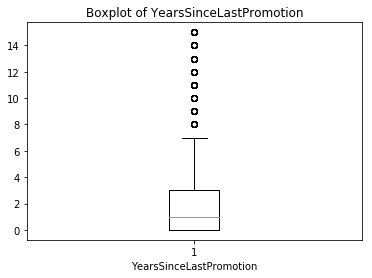

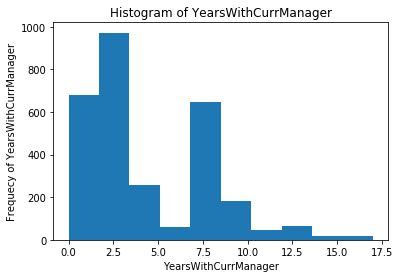

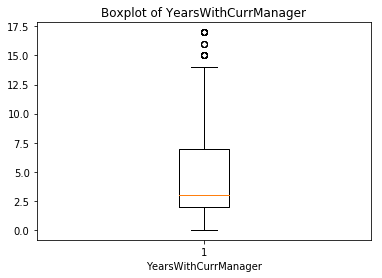

In [9]:
graph_version3(df,None)

### Bi-Variate Analysis

Plotting graphs for Bivariate analysis to check the correlation with Attrition


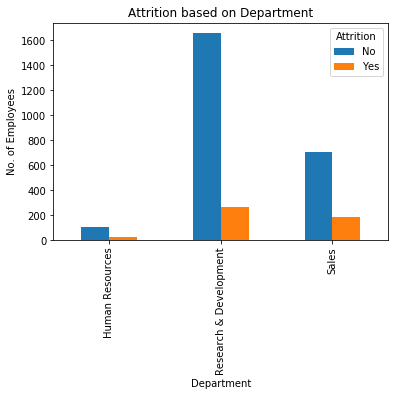

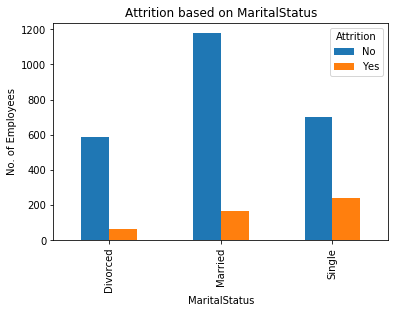

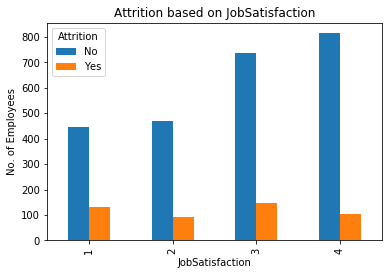

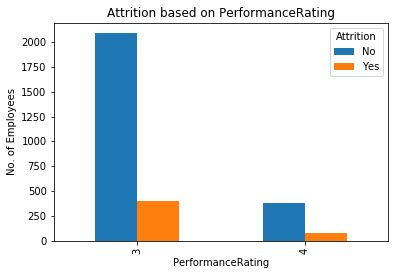

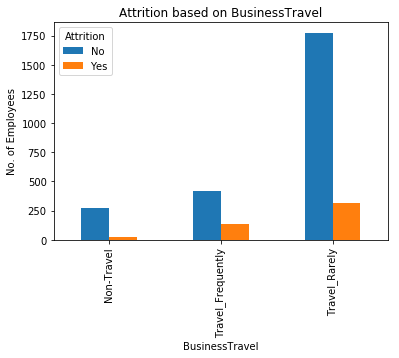

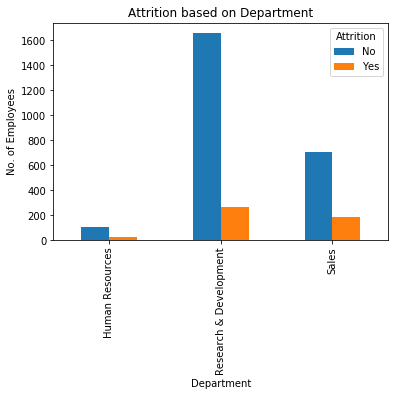

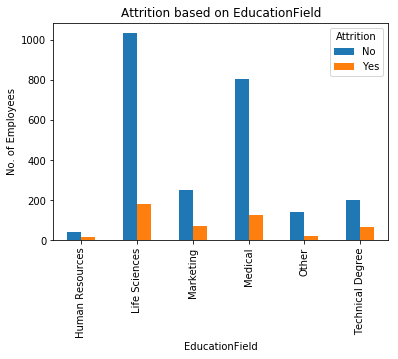

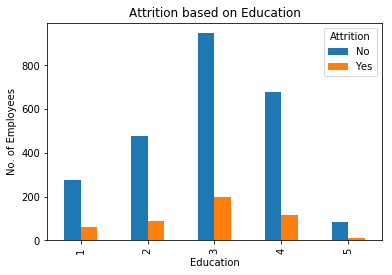

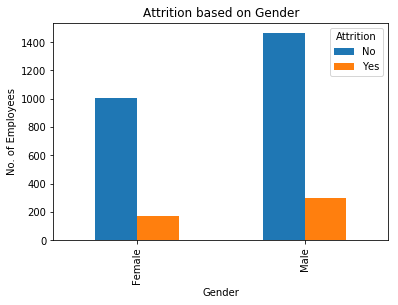

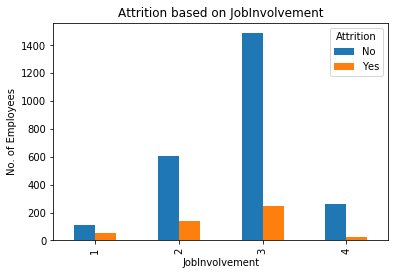

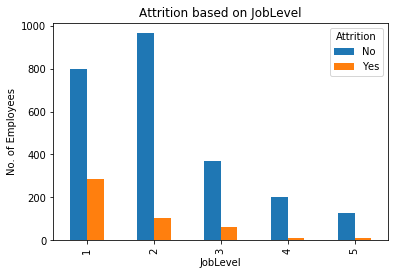

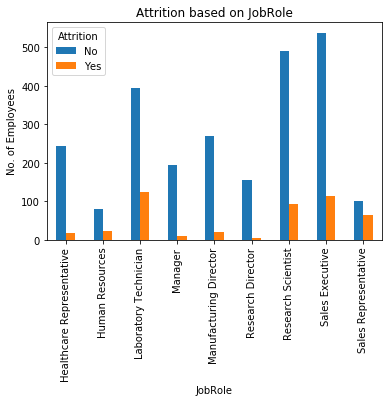

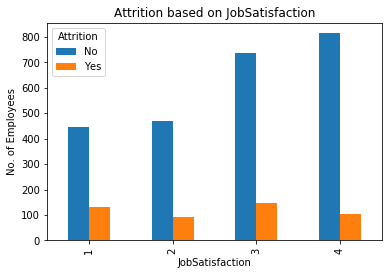

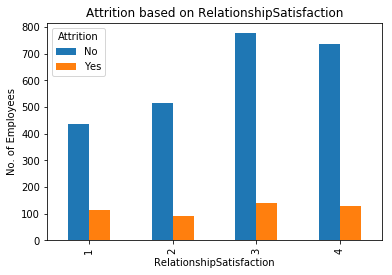

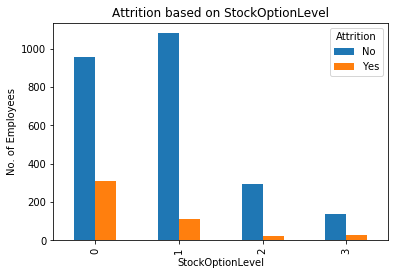

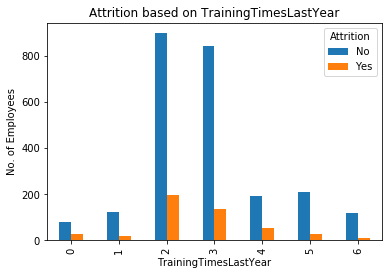

In [10]:
xcv=['Department','MaritalStatus','JobSatisfaction','PerformanceRating','BusinessTravel','Department','EducationField','Education','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']
for i in xcv:
    pd.crosstab(df[i],df.Attrition).plot(kind='bar')
    plt.title('Attrition based on '+ i)
    #plt.xlabel(i)
    plt.ylabel('No. of Employees')
    plt.show()
    

Function that plot density plots on the columns passed as input

In [11]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),var] , color='b',shade=True, label='0') 
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),var] , color='r',shade=True, label='1')
    plt.title('Employee Attrition with respect to {}'.format(var))
    

In [12]:
numerical_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    try:
        numeric_cols_kdeplot.remove(l)
    except:
        pass

Plotting KDE plots


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


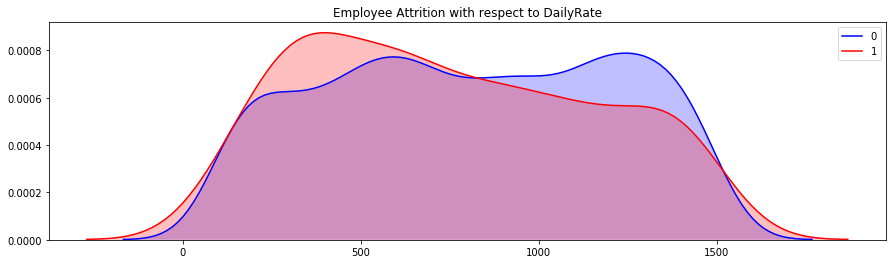

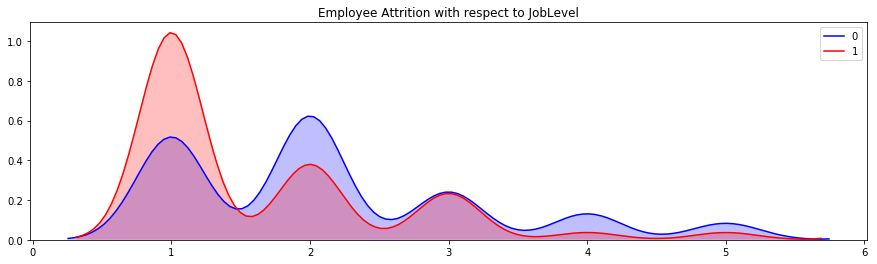

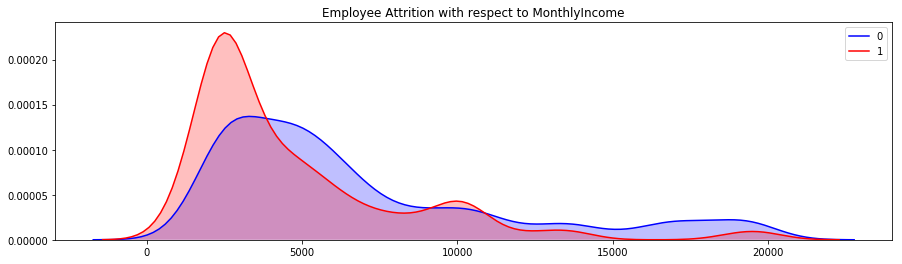

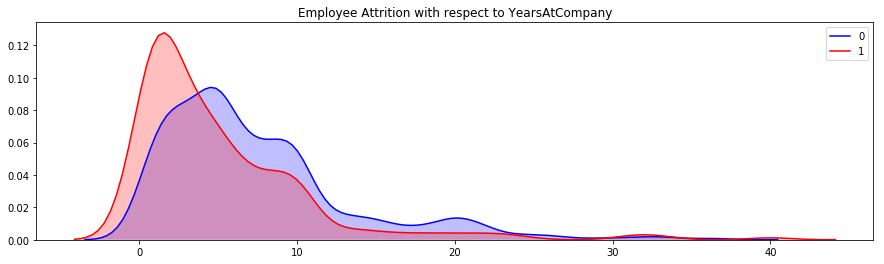

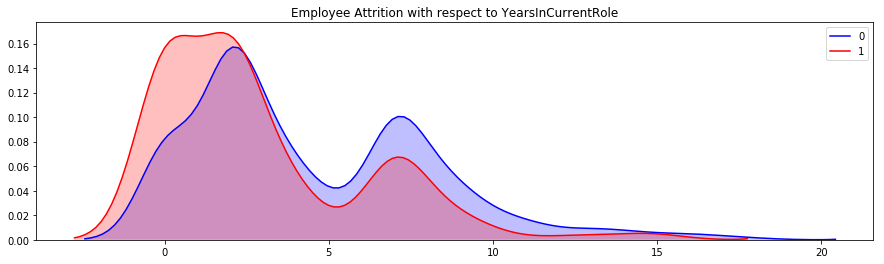

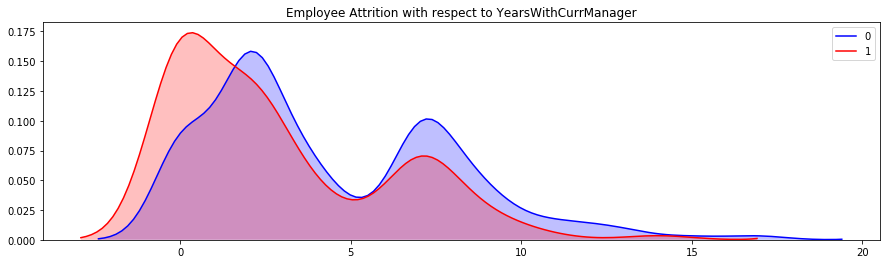

In [13]:
for n in numeric_cols_kdeplot:
    kdePlot(n)

Checking the mean of Variables on both No and Yes labels in the Target variable


In [14]:
turnover_Summary = df.groupby('Attrition')
turnover_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1472.429035,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1460.464135,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'split'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

# <span style="color:RoyalBlue">3. Split the data</span>

Separating Target variable and predictors 


In [43]:

X=df.drop(['Attrition'],axis=1)
Y=df.Attrition

### Dummies for Categorical variables

Separating  Categorical variable for label encoding


In [44]:

cols=X.loc[:,X.dtypes!='int64'].columns
cols

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Creating dummies


In [45]:
cat_vars=X.loc[:,X.dtypes!='int64'].columns
print(cat_vars)
temp=pd.DataFrame()
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var,drop_first=True)
    temp=pd.concat([temp,cat_list],axis=1)
    

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [49]:
X=X.drop(cat_vars,axis=1)
X=pd.concat([X,temp],axis=1)
X.shape

(2940, 46)

Changing Target variable from Yes and No to 0 and 1 


In [50]:
Y=np.where(Y=='Yes',1,0)

Splitting the dataset into the Training set and Test set (70:30)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Feature Scaling 

In [52]:
# Feature scaling is done to make data standard with standard deviation 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'idf'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">4. Identify columns which are of no use and drop those columns</span>

Dropping non-informative variables


In [15]:
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

Combining category 4 and 5. As this category has attrition close to category 4


In [16]:
df['Education']=df['Education'].astype(str)
df['Education']=np.where(np.logical_or(df['Education']=='5' , df['Education']=='4'),'4-5',df['Education'].astype('str'))

Correlation Matrix


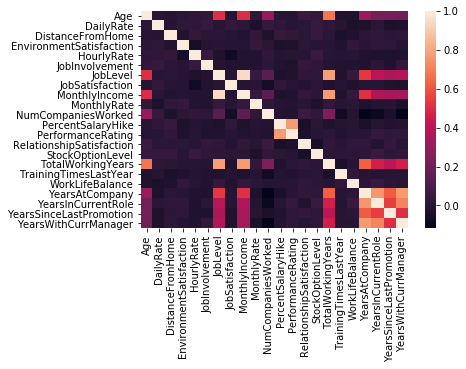

In [18]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values
           )

From above correlation plot following insights can be drawn:
    1. Years at company is correlated with years in current role, years since last promotion and years with current manager.
    2. Total working year is correlated with Job level and Monthly Income and age.
    3. There is a high correlation between Job satisfaction and Job level.
    4. Percentage Salary hike is correlated to performance rating.

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'hyp'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">5. Hypothesis</span>

1. JobSatisfaction, EnvironmentSatisfaction, Age, DailyRate, DistanceFromHome, MonthlyIncome, MonthlyRate, NumCompaniesWorked,   PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, TotalWorkingYears, WorkLifeBalance, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager contribute to Attrition in the company. (Performing T-test for the same to check the difference in the mean of the population who churned is different from overall mean.
2. Overtime is the important factor contributing towards attrition.
3. Ensembeling different models should improve accuracy. (Checking this after building all the models)

To Calculate the critical values for 95% confidence interval for T- Test


In [19]:
degree_freedom = len(df[df['Attrition']=='Yes'])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9649813627243728
The t-distribution right quartile range is: 1.9649813627243724


Performing T- test on various variable to check there significance


In [166]:
hypo_col=['JobSatisfaction','EnvironmentSatisfaction','Age','DailyRate','DistanceFromHome','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
for i in hypo_col:
    
    print('\n\t\t\t\t\t\033[1m' +'One Sample T Test for measuring {0} '.format(i)+'\033[0m')
    print(' ')
    print('Ho : The null hypothesis is that there is no difference in {0} between employees who churned and those who did not.'.format(i))
    print('Ha : The alternative hypothesis is that there is a difference in {0} between employees who churned and those who did not.'.format(i))
    print(' ')
    emp_population = df[i].mean()
    emp_turnover = df[df['Attrition']=='Yes'][i].mean()

    print( 'The mean {0} for the employee population is: '.format(i)+'\033[1m' +str(emp_population)+'\033[0m')
    print( 'The mean {0} for employees that had a Attrition is: '.format(i)+'\033[1m' + str(emp_turnover) +'\033[0m')
    a=stats.ttest_1samp(a=  df[df['Attrition']=='Yes'][i], # Sample of Employee satisfaction who says Yes to attrition
              popmean = emp_population)  # Employee Who Had No attrition 
    print(' ')
    print('T test result for variable {0} with Attrition :'.format(i) ,'\033[1m'+str(a)+'\033[0m')
    print(' ')
    if a[0]< -1.96 or a[0]>1.96:
        print('The test result shows the test statistic “t” is equal to {0}, which lie outside the 95% confidence interval, we'.format(a[0])+'\033[91m'+ '\033[1m'+' REJECT Ho'+'\033[0m'+' the null hypothesis. ')
    else:
        print('The test result shows the test statistic “t” is equal to {0}, which lie inside the 95% confidence interval, we'.format(a[0])+'\033[92m'+'\033[1m'+' ACCEPT Ho'+'\033[0m'+'  the null hypothesis. ')




					One Sample T Test for measuring JobSatisfaction 
 
Ho : The null hypothesis is that there is no difference in JobSatisfaction between employees who churned and those who did not.
Ha : The alternative hypothesis is that there is a difference in JobSatisfaction between employees who churned and those who did not.
 
The mean JobSatisfaction for the employee population is: 2.7285714285714286
The mean JobSatisfaction for employees that had a Attrition is: 2.4683544303797467
 
T test result for variable JobSatisfaction with Attrition : Ttest_1sampResult(statistic=-5.072476931000113, pvalue=5.649702501723467e-07)
 
The test result shows the test statistic “t” is equal to -5.072476931000113, which lie outside the 95% confidence interval, we REJECT Ho the null hypothesis. 

					One Sample T Test for measuring EnvironmentSatisfaction 
 
Ho : The null hypothesis is that there is no difference in EnvironmentSatisfaction between employees who churned and those who did not.
Ha : The alternati

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'nn'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">6. Neural Network Model</span>

Importing the Keras libraries and packages


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\Vinay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [54]:
#X2.shape

### Neural Net - Parameter Tuning

This is to find the best parameter for Neural Network model


In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))
    classifier.add(Dropout(p = 0.4))
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(p = 0.4))
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(p = 0.4))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [5,10,20],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}

Building the NN model from the best parameters obtained above which is epoch-200, batch_size-5, and optimizer-adam


In [60]:
# Building single NN model
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))
classifier.add(Dropout(p = 0.4))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.4))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.4))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_1=classifier.fit(X_train, y_train, batch_size = 5, epochs = 200)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
  if __name__ == '__main__':


Epoch 1/200
2058/2058 [==============================] - 2s 740us/step - loss: 0.4878 - acc: 0.8392
Epoch 2/200
2058/2058 [==============================] - 1s 419us/step - loss: 0.3922 - acc: 0.8401
Epoch 3/200
2058/2058 [==============================] - 1s 411us/step - loss: 0.3753 - acc: 0.8401
Epoch 4/200
2058/2058 [==============================] - 1s 419us/step - loss: 0.3701 - acc: 0.8401
Epoch 5/200
2058/2058 [==============================] - 1s 412us/step - loss: 0.3435 - acc: 0.8401
Epoch 6/200
2058/2058 [==============================] - 1s 431us/step - loss: 0.3567 - acc: 0.8401
Epoch 7/200
2058/2058 [==============================] - 1s 432us/step - loss: 0.3473 - acc: 0.8401
Epoch 8/200
2058/2058 [==============================] - 1s 439us/step - loss: 0.3339 - acc: 0.8401
Epoch 9/200
2058/2058 [==============================] - 1s 428us/step - loss: 0.3434 - acc: 0.8401
Epoch 10/200
2058/2058 [==============================] - 1s 428us/step - loss: 0.3229 - acc: 0.8401

2058/2058 [==============================] - 1s 471us/step - loss: 0.1904 - acc: 0.8989
Epoch 163/200
2058/2058 [==============================] - 1s 455us/step - loss: 0.1835 - acc: 0.9004
Epoch 164/200
2058/2058 [==============================] - 1s 432us/step - loss: 0.1751 - acc: 0.9052
Epoch 165/200
2058/2058 [==============================] - 1s 466us/step - loss: 0.1799 - acc: 0.9004
Epoch 166/200
2058/2058 [==============================] - 1s 467us/step - loss: 0.1975 - acc: 0.8980
Epoch 167/200
2058/2058 [==============================] - 1s 426us/step - loss: 0.1874 - acc: 0.8989
Epoch 168/200
2058/2058 [==============================] - 1s 477us/step - loss: 0.1839 - acc: 0.9018
Epoch 169/200
2058/2058 [==============================] - 1s 447us/step - loss: 0.1918 - acc: 0.8970
Epoch 170/200
2058/2058 [==============================] - 1s 496us/step - loss: 0.2032 - acc: 0.8805
Epoch 171/200
2058/2058 [==============================] - 1s 426us/step - loss: 0.1844 - acc: 0

Predicting on test data


In [61]:
pred_nn=classifier.predict(X_test)

Classifying data into 1 and 0 where probability is greater than 0.5


In [62]:
pred_1_nn=np.where(pred_nn>0.5,1,0)

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'vnn'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">7. Validating NN model</span>

Checking the confusion matrix, accuracy and score of NN model


In [159]:
accur(y_test, pred_1_nn)

Confusion Matrix :  
[[693  44]
 [ 31 114]]
 
Accuracy of the Model :  
91.49659863945578
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       737
           1       0.72      0.79      0.75       145

   micro avg       0.91      0.91      0.91       882
   macro avg       0.84      0.86      0.85       882
weighted avg       0.92      0.91      0.92       882



### Improvising the NN model using k-fold validation 

Creating new dataframe with X_train and y_train dataset


In [64]:
train=pd.DataFrame(np.matrix(X_train))
len(train)
train['Attrition']=y_train

Creating 5 folds in the train dataset


In [65]:
t=np.array_split(train,5)
for i in range(0,len(t)):
    t[i]['Fold']=i+1   
train_f=pd.concat(t)   # creating a new dataframe train_f to add a new column with name 'Fold' to separate the data into 5 folds

Here we are training the data in 4 folds and Validating it on the 5th labelled fold.


In [66]:
pred_nn=[]    # Empty list to store prediction of every 5th fold 
index=[]   # to store the indexes of the folds 
for i in range(1,6):
    index.append(train_f.loc[train_f.Fold == i,:].index)
    train_l=train_f.loc[train_f.Fold != i,:]
    x_train_l=train_l.drop(['Attrition','Fold'],axis=1)
    y_train_l=train_l.Attrition
    x_train_l=np.array(x_train_l)
    classifier.fit(x_train_l, y_train_l, batch_size = 5, epochs = 200)
    pred_nn.append(classifier.
                predict(train_f.loc[train_f.Fold == i,:].drop(['Attrition','Fold'],axis=1)))

Epoch 1/200
1646/1646 [==============================] - 1s 441us/step - loss: 0.1832 - acc: 0.8967
Epoch 2/200
1646/1646 [==============================] - 1s 432us/step - loss: 0.1791 - acc: 0.9083
Epoch 3/200
1646/1646 [==============================] - 1s 428us/step - loss: 0.1818 - acc: 0.8979
Epoch 4/200
1646/1646 [==============================] - 1s 429us/step - loss: 0.1855 - acc: 0.8998
Epoch 5/200
1646/1646 [==============================] - 1s 447us/step - loss: 0.1735 - acc: 0.9089
Epoch 6/200
1646/1646 [==============================] - 1s 435us/step - loss: 0.1981 - acc: 0.8900
Epoch 7/200
1646/1646 [==============================] - 1s 427us/step - loss: 0.1788 - acc: 0.9040
Epoch 8/200
1646/1646 [==============================] - 1s 419us/step - loss: 0.1769 - acc: 0.9010
Epoch 9/200
1646/1646 [==============================] - 1s 452us/step - loss: 0.1793 - acc: 0.9046
Epoch 10/200
1646/1646 [==============================] - 1s 421us/step - loss: 0.1924 - acc: 0.9034

1646/1646 [==============================] - 1s 409us/step - loss: 0.1704 - acc: 0.9119
Epoch 163/200
1646/1646 [==============================] - 1s 421us/step - loss: 0.1750 - acc: 0.9089
Epoch 164/200
1646/1646 [==============================] - 1s 432us/step - loss: 0.1532 - acc: 0.9235
Epoch 165/200
1646/1646 [==============================] - 1s 431us/step - loss: 0.1720 - acc: 0.9083
Epoch 166/200
1646/1646 [==============================] - 1s 421us/step - loss: 0.1753 - acc: 0.9077
Epoch 167/200
1646/1646 [==============================] - 1s 413us/step - loss: 0.1743 - acc: 0.9101
Epoch 168/200
1646/1646 [==============================] - 1s 418us/step - loss: 0.1574 - acc: 0.9210
Epoch 169/200
1646/1646 [==============================] - 1s 391us/step - loss: 0.1705 - acc: 0.9149
Epoch 170/200
1646/1646 [==============================] - 1s 415us/step - loss: 0.1765 - acc: 0.9040
Epoch 171/200
1646/1646 [==============================] - 1s 414us/step - loss: 0.1611 - acc: 0

Epoch 43/200
1646/1646 [==============================] - 1s 402us/step - loss: 0.1722 - acc: 0.9107 0s - loss: 0.1642 - acc:
Epoch 44/200
1646/1646 [==============================] - 1s 427us/step - loss: 0.1644 - acc: 0.9253
Epoch 45/200
1646/1646 [==============================] - 1s 400us/step - loss: 0.1831 - acc: 0.9113
Epoch 46/200
1646/1646 [==============================] - 1s 377us/step - loss: 0.1686 - acc: 0.9162
Epoch 47/200
1646/1646 [==============================] - 1s 400us/step - loss: 0.1765 - acc: 0.9077
Epoch 48/200
1646/1646 [==============================] - 1s 362us/step - loss: 0.1607 - acc: 0.9241
Epoch 49/200
1646/1646 [==============================] - 1s 358us/step - loss: 0.1830 - acc: 0.9156
Epoch 50/200
1646/1646 [==============================] - 1s 368us/step - loss: 0.1768 - acc: 0.9131
Epoch 51/200
1646/1646 [==============================] - 1s 422us/step - loss: 0.1638 - acc: 0.9204
Epoch 52/200
1646/1646 [==============================] - 1s 378us

1646/1646 [==============================] - 1s 403us/step - loss: 0.2309 - acc: 0.9119
Epoch 3/200
1646/1646 [==============================] - 1s 397us/step - loss: 0.2078 - acc: 0.9034
Epoch 4/200
1646/1646 [==============================] - 1s 415us/step - loss: 0.2082 - acc: 0.9046
Epoch 5/200
1646/1646 [==============================] - 1s 407us/step - loss: 0.2204 - acc: 0.9052
Epoch 6/200
1646/1646 [==============================] - 1s 411us/step - loss: 0.2151 - acc: 0.8961
Epoch 7/200
1646/1646 [==============================] - 1s 416us/step - loss: 0.2120 - acc: 0.8985
Epoch 8/200
1646/1646 [==============================] - 1s 400us/step - loss: 0.1990 - acc: 0.9113
Epoch 9/200
1646/1646 [==============================] - 1s 412us/step - loss: 0.1942 - acc: 0.9113
Epoch 10/200
1646/1646 [==============================] - 1s 413us/step - loss: 0.1726 - acc: 0.9235
Epoch 11/200
1646/1646 [==============================] - 1s 415us/step - loss: 0.1914 - acc: 0.9143
Epoch 12/2

1646/1646 [==============================] - 1s 405us/step - loss: 0.1853 - acc: 0.9089
Epoch 164/200
1646/1646 [==============================] - 1s 415us/step - loss: 0.1806 - acc: 0.9186
Epoch 165/200
1646/1646 [==============================] - 1s 413us/step - loss: 0.1712 - acc: 0.9137
Epoch 166/200
1646/1646 [==============================] - 1s 416us/step - loss: 0.1903 - acc: 0.9058
Epoch 167/200
1646/1646 [==============================] - 1s 411us/step - loss: 0.1866 - acc: 0.9119
Epoch 168/200
1646/1646 [==============================] - 1s 416us/step - loss: 0.1764 - acc: 0.9125
Epoch 169/200
1646/1646 [==============================] - 1s 415us/step - loss: 0.1747 - acc: 0.9192
Epoch 170/200
1646/1646 [==============================] - 1s 414us/step - loss: 0.1839 - acc: 0.9180
Epoch 171/200
1646/1646 [==============================] - 1s 417us/step - loss: 0.1625 - acc: 0.9235
Epoch 172/200
1646/1646 [==============================] - 1s 410us/step - loss: 0.1790 - acc: 0

Epoch 44/200
1647/1647 [==============================] - 1s 420us/step - loss: 0.1654 - acc: 0.9192
Epoch 45/200
1647/1647 [==============================] - 1s 410us/step - loss: 0.1652 - acc: 0.9180
Epoch 46/200
1647/1647 [==============================] - 1s 394us/step - loss: 0.1697 - acc: 0.9156
Epoch 47/200
1647/1647 [==============================] - 1s 416us/step - loss: 0.1686 - acc: 0.9186
Epoch 48/200
1647/1647 [==============================] - 1s 418us/step - loss: 0.1661 - acc: 0.9205
Epoch 49/200
1647/1647 [==============================] - 1s 411us/step - loss: 0.1718 - acc: 0.9150
Epoch 50/200
1647/1647 [==============================] - 1s 414us/step - loss: 0.1710 - acc: 0.9162
Epoch 51/200
1647/1647 [==============================] - 1s 424us/step - loss: 0.1766 - acc: 0.9107
Epoch 52/200
1647/1647 [==============================] - 1s 416us/step - loss: 0.1719 - acc: 0.9132
Epoch 53/200
1647/1647 [==============================] - 1s 413us/step - loss: 0.1671 - ac

1647/1647 [==============================] - 1s 412us/step - loss: 0.1914 - acc: 0.9065
Epoch 5/200
1647/1647 [==============================] - 1s 421us/step - loss: 0.1896 - acc: 0.9053
Epoch 6/200
1647/1647 [==============================] - 1s 416us/step - loss: 0.1769 - acc: 0.9120
Epoch 7/200
1647/1647 [==============================] - 1s 427us/step - loss: 0.1823 - acc: 0.9083
Epoch 8/200
1647/1647 [==============================] - 1s 425us/step - loss: 0.1749 - acc: 0.9205
Epoch 9/200
1647/1647 [==============================] - 1s 418us/step - loss: 0.1686 - acc: 0.9162
Epoch 10/200
1647/1647 [==============================] - 1s 423us/step - loss: 0.1607 - acc: 0.9271
Epoch 11/200
1647/1647 [==============================] - 1s 418us/step - loss: 0.1642 - acc: 0.9253
Epoch 12/200
1647/1647 [==============================] - 1s 412us/step - loss: 0.1660 - acc: 0.9229
Epoch 13/200
1647/1647 [==============================] - 1s 413us/step - loss: 0.1694 - acc: 0.9156
Epoch 14

1647/1647 [==============================] - 1s 399us/step - loss: 0.1707 - acc: 0.9156
Epoch 86/200
1647/1647 [==============================] - 1s 412us/step - loss: 0.1682 - acc: 0.9156
Epoch 87/200
1647/1647 [==============================] - 1s 417us/step - loss: 0.1756 - acc: 0.9114
Epoch 88/200
1647/1647 [==============================] - 1s 414us/step - loss: 0.1765 - acc: 0.9138
Epoch 89/200
1647/1647 [==============================] - 1s 405us/step - loss: 0.1822 - acc: 0.9144
Epoch 90/200
1647/1647 [==============================] - 1s 395us/step - loss: 0.1795 - acc: 0.9083
Epoch 91/200
1647/1647 [==============================] - 1s 414us/step - loss: 0.1692 - acc: 0.9156
Epoch 92/200
1647/1647 [==============================] - 1s 402us/step - loss: 0.1641 - acc: 0.9199
Epoch 93/200
1647/1647 [==============================] - 1s 414us/step - loss: 0.1718 - acc: 0.9144
Epoch 94/200
1647/1647 [==============================] - 1s 397us/step - loss: 0.1663 - acc: 0.9186
Epo

In [68]:
for i in range(len(pred_nn)):
    pred_nn[i]=np.where(pred_nn[i]>0.5,1,0)

In [69]:
for i in range(len(pred_nn)):
    train_f.loc[index[i],'M1']=pred_nn[i]

Defining the test data to Validating the above model


In [70]:
test=pd.DataFrame(np.matrix(X_test))
test.shape

(882, 46)

Fitting the above classifier on X_train, Y_train data


In [71]:
classifier.fit(X_train, y_train, batch_size = 5, epochs = 200)
#test['M1']=classifier.predict(np.array(X_test))

Epoch 1/200
2058/2058 [==============================] - 1s 437us/step - loss: 0.2011 - acc: 0.9208
Epoch 2/200
2058/2058 [==============================] - 1s 426us/step - loss: 0.1977 - acc: 0.9155
Epoch 3/200
2058/2058 [==============================] - 1s 439us/step - loss: 0.2025 - acc: 0.9072
Epoch 4/200
2058/2058 [==============================] - 1s 417us/step - loss: 0.1870 - acc: 0.9223
Epoch 5/200
2058/2058 [==============================] - 1s 435us/step - loss: 0.1977 - acc: 0.9135
Epoch 6/200
2058/2058 [==============================] - 1s 448us/step - loss: 0.1901 - acc: 0.9266
Epoch 7/200
2058/2058 [==============================] - 1s 434us/step - loss: 0.1854 - acc: 0.9232
Epoch 8/200
2058/2058 [==============================] - 1s 426us/step - loss: 0.1877 - acc: 0.9213
Epoch 9/200
2058/2058 [==============================] - 1s 425us/step - loss: 0.2020 - acc: 0.9159
Epoch 10/200
2058/2058 [==============================] - 1s 422us/step - loss: 0.1959 - acc: 0.9130

2058/2058 [==============================] - 1s 413us/step - loss: 0.1813 - acc: 0.9096
Epoch 162/200
2058/2058 [==============================] - 1s 413us/step - loss: 0.1790 - acc: 0.9130
Epoch 163/200
2058/2058 [==============================] - 1s 412us/step - loss: 0.1629 - acc: 0.9218
Epoch 164/200
2058/2058 [==============================] - 1s 414us/step - loss: 0.1737 - acc: 0.9164
Epoch 165/200
2058/2058 [==============================] - 1s 417us/step - loss: 0.1680 - acc: 0.9198
Epoch 166/200
2058/2058 [==============================] - 1s 413us/step - loss: 0.1730 - acc: 0.9213
Epoch 167/200
2058/2058 [==============================] - 1s 414us/step - loss: 0.1616 - acc: 0.9257
Epoch 168/200
2058/2058 [==============================] - 1s 418us/step - loss: 0.1680 - acc: 0.9198
Epoch 169/200
2058/2058 [==============================] - 1s 411us/step - loss: 0.1632 - acc: 0.9203
Epoch 170/200
2058/2058 [==============================] - 1s 415us/step - loss: 0.1712 - acc: 0

In [72]:
pred_2_nn=classifier.predict(np.array(X_test))
test['M1']=np.where(pred_2_nn>0.5,1,0)

In [73]:
accur(y_test,test['M1'])

Confusion Matrix :  
[[705  32]
 [ 32 113]]
 
Accuracy of the Model :  
92.7437641723356
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       737
           1       0.78      0.78      0.78       145

   micro avg       0.93      0.93      0.93       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.93      0.93      0.93       882



In [74]:
#test.head()

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'rf'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">8. Random Forest model</span>

Building a Random Forest model


In [75]:
rf1=RandomForestClassifier(max_features = 30,n_estimators=100)
rf1.fit(X_train, y_train)
pred_1_rf=rf1.predict(np.array(X_test))
test['M2']=pred_1_rf

In [113]:
feat_importances.index
pos = feat_importances.index.tolist()
colname = X.columns[pos]

In [121]:
dicti={}
vb=feat_importances.index.tolist()
for i in range(len(feat_importances.index)):
    dicti[vb[i]]=colname[i]

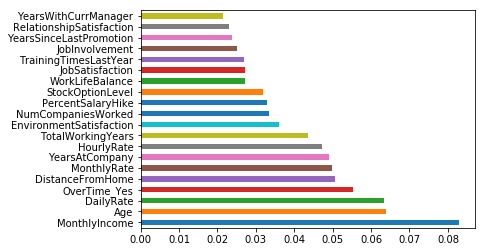

In [120]:
feat_importances = pd.Series(rf1.feature_importances_,index=(pd.DataFrame(X_train)).columns)
feat_importances = feat_importances.nlargest(20)
feat_importances=feat_importances.rename(dicti)
feat_importances.plot(kind='barh')

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'vrf'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">9. Validating RF model</span>

In [78]:
accur(y_test,pred_1_rf)

Confusion Matrix :  
[[731   6]
 [ 28 117]]
 
Accuracy of the Model :  
96.14512471655328
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       737
           1       0.95      0.81      0.87       145

   micro avg       0.96      0.96      0.96       882
   macro avg       0.96      0.90      0.93       882
weighted avg       0.96      0.96      0.96       882



### Using k-fold for Random Forest Model 

Preparing the training data and spliting them in 5-folds. Creating a new variable to store labels of folding from 1 to 5.


In [79]:
t=np.array_split(train,5)

for i in range(0,len(t)):
    t[i]['Fold']=i+1   
train_f1=pd.concat(t)

In [80]:
train_f1.shape

(2058, 48)

In [81]:
train_f1.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,          23,          24,
                25,          26,          27,          28,          29,
                30,          31,          32,          33,          34,
                35,          36,          37,          38,          39,
                40,          41,          42,          43,          44,
                45, 'Attrition',      'Fold'],
      dtype='object')

Building Randon Forest on 4 folds and predicting on 5th one.

In [82]:
pred=[]
index=[]
for i in range(1,6):
    index.append(train_f1.loc[train_f1.Fold == i,:].index)
    train_l=train_f1.loc[train_f1.Fold != i,:]
    x_train_l=train_l.drop(['Attrition','Fold'],axis=1)
    y_train_l=train_l.Attrition
    x_train_l=np.array(x_train_l)
    rf=RandomForestClassifier(max_features=30,n_estimators=100)
    rf.fit(x_train_l, y_train_l)
    pred.append(rf.predict(train_f1.loc[train_f1.Fold == i,:].drop(['Attrition','Fold'],axis=1)))

Storing the predictions on a variable named 'M2' in training dataset


In [83]:
for i in range(len(pred)):
    train_f1.loc[index[i],'M2']=pred[i]

In [84]:
pred_2_rf=rf.predict(X_test)

In [85]:
accur(y_test,pred_2_rf)

Confusion Matrix :  
[[731   6]
 [ 41 104]]
 
Accuracy of the Model :  
94.67120181405896
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       737
           1       0.95      0.72      0.82       145

   micro avg       0.95      0.95      0.95       882
   macro avg       0.95      0.85      0.89       882
weighted avg       0.95      0.95      0.94       882



<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'cmp'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">10. Compare NN and Rf model</span>

**Neural Network Model**

In [161]:
accur(y_test, test.M1)

Confusion Matrix :  
[[705  32]
 [ 32 113]]
 
Accuracy of the Model :  
92.7437641723356
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       737
           1       0.78      0.78      0.78       145

   micro avg       0.93      0.93      0.93       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.93      0.93      0.93       882



**Random Forest Model**

In [162]:
accur(y_test, test.M2)

Confusion Matrix :  
[[731   6]
 [ 28 117]]
 
Accuracy of the Model :  
96.14512471655328
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       737
           1       0.95      0.81      0.87       145

   micro avg       0.96      0.96      0.96       882
   macro avg       0.96      0.90      0.93       882
weighted avg       0.96      0.96      0.96       882



<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'ensemble'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">11. Combine NN and RF into Ensemble Model</span>

### Stacking RF and Neural Nets

Combining NN and Randon Forest model into Ensemble model


In [86]:

x1=pd.DataFrame(train_f.M1)
x1['M2']=train_f1.M2
#x1.head()

Building XGBoost model, taking RF and Neural nets output (M2, M1) as input to this model


from xgboost.sklearn import XGBClassifier
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,min_sample_split=5,
 max_depth=3,
 objective= 'binary:logistic',
 seed=100)

xgb2.fit(x1, y_train)

In [88]:
test_new=test[['M1','M2']]

In [89]:
pred_stack=xgb2.predict(test_new)

In [90]:
pred_stack[:5]

array([0, 1, 0, 0, 0])

<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'check'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">12. Checking whether Ensemble Model Performance outperforms the individual RF & NN model </span>


**Neural Network Model**

In [92]:
accur(y_test, test.M1)

Confusion Matrix :  
[[705  32]
 [ 32 113]]
 
Accuracy of the Model :  
92.7437641723356
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       737
           1       0.78      0.78      0.78       145

   micro avg       0.93      0.93      0.93       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.93      0.93      0.93       882



**Random Forest Model**

In [93]:
accur(y_test, test.M2)

Confusion Matrix :  
[[731   6]
 [ 28 117]]
 
Accuracy of the Model :  
96.14512471655328
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       737
           1       0.95      0.81      0.87       145

   micro avg       0.96      0.96      0.96       882
   macro avg       0.96      0.90      0.93       882
weighted avg       0.96      0.96      0.96       882



**Ensemble Model**

In [94]:
accur(y_test, pred_stack)

Confusion Matrix :  
[[705  32]
 [ 32 113]]
 
Accuracy of the Model :  
92.7437641723356
 
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       737
           1       0.78      0.78      0.78       145

   micro avg       0.93      0.93      0.93       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.93      0.93      0.93       882



<br> <hr id='end'>
                              <h1 style="font-size:16px ; text-align:center;">[Back to Contents](#toc) </h1>
</br></hr>

<br id = 'lg'>
<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
</br>

## <span style="color:RoyalBlue">13. Insights and Conclusions </span>


Interpetation from graphs and models

1. From NN model and Random Forest model, Random Forest is performing with accuarcy 96%.
2. Ensemble of NN and Random Forest is not performing good rather it is just immitatting NN model. From all three models Random Forest is performing best.
3. Hypothsis:
    1. Overtime is contributing to Attrition is validated from Feature importance model of Random Forest.
    2. Ensemble model fails to provide a good model, this is validated from accuracy comparision of all three models.
    
4. Insights:
    1. Monthly Income, Age, Overtime, Daily Rate, Distance from home are some of the key important features affecting Attrition.
    2. Company should focus on these parameters to avoid high attrition rate in the company.
    3. With this dataset Percentage salary hike,PerformanceRating, YearsSinceLastPromotion is not helping predicting attrition. May be larger dataset would help in this situation.
    